In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('/project/datacamp/team3/t3user2/과제/train.csv')
test = pd.read_csv('/project/datacamp/team3/t3user2/과제/test.csv')
sample = pd.read_csv('/project/datacamp/team3/t3user2/과제/sample_submission.csv')
interest_rate = pd.read_csv('/project/datacamp/team3/t3user1/interest_rate.csv',encoding='cp949')

In [2]:
from matplotlib import font_manager , rc
font_path = '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font)

## 데이터의 타입 및 형태 확인

In [3]:
display(train.head(),train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5987 entries, 0 to 5986
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5987 non-null   object 
 1   sigungu                 5987 non-null   object 
 2   jibun                   5987 non-null   object 
 3   apt_name                5987 non-null   object 
 4   exclusive_use_area      5987 non-null   float64
 5   transaction_year_month  5987 non-null   int64  
 6   transaction_day         5987 non-null   int64  
 7   transaction_real_price  5987 non-null   int64  
 8   floor                   5987 non-null   int64  
 9   year_of_completion      5987 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 467.9+ KB


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion
0,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,7,174000,13,1983
1,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,9,157500,6,1983
2,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000,5,1983
3,TRAIN_0003,서울특별시 강남구 대치동,503,개포우성1,127.61,201402,10,152000,9,1983
4,TRAIN_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,201402,10,116000,3,1983


None

## 타켓의 평균값 구하기

In [4]:
# 우리가 만든 모델이 의미 있는지 판단하려면 평균보다는 정확한 결과를 내야한다

mean_apt_price = round(train['transaction_real_price'].mean())
display(mean_apt_price)


158145

## test와 train 데이터를 합치기

In [5]:
train['train_test'] = 'train'
test['train_test'] = 'test'
all_data = pd.concat([train,test])
all_data = all_data.reset_index(drop=True)

display(train,test,all_data)

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test
0,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,7,174000,13,1983,train
1,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,9,157500,6,1983,train
2,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000,5,1983,train
3,TRAIN_0003,서울특별시 강남구 대치동,503,개포우성1,127.61,201402,10,152000,9,1983,train
4,TRAIN_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,201402,10,116000,3,1983,train
...,...,...,...,...,...,...,...,...,...,...,...
5982,TRAIN_5982,서울특별시 강남구 대치동,511,한보미도맨션2,190.47,202205,9,507500,8,1985,train
5983,TRAIN_5983,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202206,24,380000,10,1985,train
5984,TRAIN_5984,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202206,24,380000,10,1985,train
5985,TRAIN_5985,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202207,12,380000,7,1985,train


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,floor,year_of_completion,train_test
0,TEST_0000,서울특별시 강남구 대치동,977,(977-),77.97,202304,10,2,2021,test
1,TEST_0001,서울특별시 강남구 대치동,977,(977-),59.99,202304,10,2,2021,test
2,TEST_0002,서울특별시 강남구 대치동,503,개포우성1,84.81,202301,13,3,1983,test
3,TEST_0003,서울특별시 강남구 대치동,503,개포우성1,84.81,202301,19,9,1983,test
4,TEST_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,202302,15,5,1983,test
...,...,...,...,...,...,...,...,...,...,...
191,TEST_0191,서울특별시 강남구 대치동,511,한보미도맨션2,84.96,202306,9,1,1985,test
192,TEST_0192,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,19,1,1985,test
193,TEST_0193,서울특별시 강남구 대치동,511,한보미도맨션2,190.47,202306,21,13,1985,test
194,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,12,1985,test


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test
0,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,7,174000.0,13,1983,train
1,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,9,157500.0,6,1983,train
2,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000.0,5,1983,train
3,TRAIN_0003,서울특별시 강남구 대치동,503,개포우성1,127.61,201402,10,152000.0,9,1983,train
4,TRAIN_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,201402,10,116000.0,3,1983,train
...,...,...,...,...,...,...,...,...,...,...,...
6178,TEST_0191,서울특별시 강남구 대치동,511,한보미도맨션2,84.96,202306,9,NaN,1,1985,test
6179,TEST_0192,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,19,NaN,1,1985,test
6180,TEST_0193,서울특별시 강남구 대치동,511,한보미도맨션2,190.47,202306,21,NaN,13,1985,test
6181,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,test


## 날짜 데이터 
transaction_year_month와 transaction_day와 분리되어 있어 불편하니 사용하기 편한 datetime으로 변경

In [6]:
def preprocess_tran_date(x):
    if type(x) == int:
        if x < 10 :
            return '0' + str(x)
        else :
            return str(x)
        
all_data['transaction_day'] = all_data['transaction_day'].apply(preprocess_tran_date)
all_data['transaction_date'] = all_data['transaction_year_month'].astype(int).astype(str) + all_data['transaction_day'].astype(str)
all_data['transaction_date'] = pd.to_datetime(all_data['transaction_date'])
all_data = all_data.sort_values('transaction_date').reset_index(drop=True)
display(all_data)

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000.0,16,2005,train,2014-01-02
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000.0,5,2008,train,2014-01-02
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600.0,8,1999,train,2014-01-04
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000.0,5,1983,train,2014-01-04
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000.0,20,2004,train,2014-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...
6178,TEST_0161,서울특별시 강남구 대치동,902,포스코더샵,139.54,202306,23,NaN,16,2004,test,2023-06-23
6179,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,test,2023-06-23
6180,TEST_0013,서울특별시 강남구 대치동,500,개포우성2,84.69,202306,24,NaN,1,1984,test,2023-06-24
6181,TEST_0045,서울특별시 강남구 대치동,63,"대치우성아파트1동,2동,3동,5동,6동,7동",84.69,202306,24,NaN,12,1984,test,2023-06-24


In [7]:
melong = pd.read_csv('/project/datacamp/team3/t3user1/규모별_매매가격지수.csv',encoding = 'cp949')
melong.tail(30)

,지역별,주택유형별,주택규모별,시점,데이터
572,수도권,아파트,규모6,2020.07,90.6
573,수도권,아파트,규모6,2020.08,91.1
574,수도권,아파트,규모6,2020.09,91.8
575,수도권,아파트,규모6,2020.10,92.4
576,수도권,아파트,규모6,2020.11,93.1
577,수도권,아파트,규모6,2020.12,94.0
578,수도권,아파트,규모6,2021.01,94.9
579,수도권,아파트,규모6,2021.02,96.0
580,수도권,아파트,규모6,2021.03,96.7
581,수도권,아파트,규모6,2021.04,97.5


# 새로운 칼럼 가져오기

## 전국 아파트 매매 동향 가져오기 및 데이터 확인

In [8]:
korea_price = pd.read_csv('/project/datacamp/team3/t3user1/newapart.csv',encoding = 'cp949')
korea_price


,주택유형별,지역별,주택규모별,시점,데이터
0,아파트,수도권,규모1,2017.11,90.0
1,아파트,수도권,규모1,2017.12,90.2
2,아파트,수도권,규모1,2018.01,90.4
3,아파트,수도권,규모1,2018.02,90.7
4,아파트,수도권,규모1,2018.03,90.9
...,...,...,...,...,...
633,아파트,수도권,규모6,2023.02,98.8
634,아파트,수도권,규모6,2023.03,97.9
635,아파트,수도권,규모6,2023.04,97.5
636,아파트,수도권,규모6,2023.05,97.4


In [9]:
korea_price['주택규모별'] = korea_price['주택규모별'].str.replace('규모', '')
korea_price

,주택유형별,지역별,주택규모별,시점,데이터
0,아파트,수도권,1,2017.11,90.0
1,아파트,수도권,1,2017.12,90.2
2,아파트,수도권,1,2018.01,90.4
3,아파트,수도권,1,2018.02,90.7
4,아파트,수도권,1,2018.03,90.9
...,...,...,...,...,...
633,아파트,수도권,6,2023.02,98.8
634,아파트,수도권,6,2023.03,97.9
635,아파트,수도권,6,2023.04,97.5
636,아파트,수도권,6,2023.05,97.4


## korea_price 날짜 처리

In [10]:
korea_price_copy=korea_price
korea_price_copy["연도"]=0
korea_price_copy["월"]=0


In [11]:
for i,x in enumerate(korea_price['시점']):
    korea_price_copy.iloc[i,-2]=int(str(x).split('.')[0])
    
    if len(str(x).split('.')[1]) == 1 :
        korea_price_copy.iloc[i,-1]=10
    else:
        korea_price_copy.iloc[i,-1]=int(str(x).split('.')[1])

        

#시점 열 읽어와서 .기준으로 스플릿 하고 앞에껀 그대로 '연도' 열에 넣고 뒤에껀 10월은 1이되기 때문에 (1월은 01) 길이가 1인 것은 10월로 나머지는 그대로 '월' 열에넣기


In [12]:
korea_price=korea_price_copy

In [13]:
korea_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주택유형별   638 non-null    object 
 1   지역별     638 non-null    object 
 2   주택규모별   638 non-null    object 
 3   시점      638 non-null    float64
 4   데이터     638 non-null    float64
 5   연도      638 non-null    int64  
 6   월       638 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 35.0+ KB


## all_data 에 규모 데이터 추가하기

In [14]:
def size(x):
    if x <= 40 :
        return '1'
    elif x <= 60 :
        return '2'
    elif x <= 85 :
        return '3'
    elif x <= 102 :
        return '4'
    elif x <= 135 :
        return '5'
    else :
        return '6'
    
    
all_data['주택규모별'] = all_data['exclusive_use_area'].apply(size)
all_data

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,주택규모별
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000.0,16,2005,train,2014-01-02,6
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000.0,5,2008,train,2014-01-02,3
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600.0,8,1999,train,2014-01-04,3
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000.0,5,1983,train,2014-01-04,6
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000.0,20,2004,train,2014-01-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,TEST_0161,서울특별시 강남구 대치동,902,포스코더샵,139.54,202306,23,NaN,16,2004,test,2023-06-23,6
6179,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,test,2023-06-23,5
6180,TEST_0013,서울특별시 강남구 대치동,500,개포우성2,84.69,202306,24,NaN,1,1984,test,2023-06-24,3
6181,TEST_0045,서울특별시 강남구 대치동,63,"대치우성아파트1동,2동,3동,5동,6동,7동",84.69,202306,24,NaN,12,1984,test,2023-06-24,3


In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6183 entries, 0 to 6182
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      6183 non-null   object        
 1   sigungu                 6183 non-null   object        
 2   jibun                   6183 non-null   object        
 3   apt_name                6183 non-null   object        
 4   exclusive_use_area      6183 non-null   float64       
 5   transaction_year_month  6183 non-null   int64         
 6   transaction_day         6183 non-null   object        
 7   transaction_real_price  5987 non-null   float64       
 8   floor                   6183 non-null   int64         
 9   year_of_completion      6183 non-null   int64         
 10  train_test              6183 non-null   object        
 11  transaction_date        6183 non-null   datetime64[ns]
 12  주택규모별                   6183 non-null   object  

In [16]:
# 데이터 연도와 월 따로 저장

all_data['연도'] = all_data['transaction_date'].dt.year
all_data['월'] = all_data['transaction_date'].dt.month



In [17]:
korea_price

,주택유형별,지역별,주택규모별,시점,데이터,연도,월
0,아파트,수도권,1,2017.11,90.0,2017,11
1,아파트,수도권,1,2017.12,90.2,2017,12
2,아파트,수도권,1,2018.01,90.4,2018,1
3,아파트,수도권,1,2018.02,90.7,2018,2
4,아파트,수도권,1,2018.03,90.9,2018,3
...,...,...,...,...,...,...,...
633,아파트,수도권,6,2023.02,98.8,2023,2
634,아파트,수도권,6,2023.03,97.9,2023,3
635,아파트,수도권,6,2023.04,97.5,2023,4
636,아파트,수도권,6,2023.05,97.4,2023,5


## all_data 매매지수 칼럼 추가

In [18]:
all_data
all_data["매매지수"]=0

In [19]:
for i,x in enumerate(all_data[['주택규모별','연도','월']].values):
    for ii, y in enumerate(korea_price[['주택규모별','연도','월']].values):
        if (x[0]==y[0]) and (x[1]==y[1]) and (x[2]==y[2]):
             all_data.iloc[i,-1]=korea_price.iloc[ii,-3]
        else:
            pass
    


In [20]:
all_data

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,주택규모별,연도,월,매매지수
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000.0,16,2005,train,2014-01-02,6,2014,1,79.3
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000.0,5,2008,train,2014-01-02,3,2014,1,70.5
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600.0,8,1999,train,2014-01-04,3,2014,1,70.5
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000.0,5,1983,train,2014-01-04,6,2014,1,79.3
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000.0,20,2004,train,2014-01-04,1,2014,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,TEST_0161,서울특별시 강남구 대치동,902,포스코더샵,139.54,202306,23,NaN,16,2004,test,2023-06-23,6,2023,6,97.5
6179,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,test,2023-06-23,5,2023,6,94.2
6180,TEST_0013,서울특별시 강남구 대치동,500,개포우성2,84.69,202306,24,NaN,1,1984,test,2023-06-24,3,2023,6,90.0
6181,TEST_0045,서울특별시 강남구 대치동,63,"대치우성아파트1동,2동,3동,5동,6동,7동",84.69,202306,24,NaN,12,1984,test,2023-06-24,3,2023,6,90.0


In [21]:
all_data.drop(['연도','월'], axis=1)

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,주택규모별,매매지수
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000.0,16,2005,train,2014-01-02,6,79.3
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000.0,5,2008,train,2014-01-02,3,70.5
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600.0,8,1999,train,2014-01-04,3,70.5
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000.0,5,1983,train,2014-01-04,6,79.3
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000.0,20,2004,train,2014-01-04,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,TEST_0161,서울특별시 강남구 대치동,902,포스코더샵,139.54,202306,23,NaN,16,2004,test,2023-06-23,6,97.5
6179,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,test,2023-06-23,5,94.2
6180,TEST_0013,서울특별시 강남구 대치동,500,개포우성2,84.69,202306,24,NaN,1,1984,test,2023-06-24,3,90.0
6181,TEST_0045,서울특별시 강남구 대치동,63,"대치우성아파트1동,2동,3동,5동,6동,7동",84.69,202306,24,NaN,12,1984,test,2023-06-24,3,90.0


## all_data 매매지수 칼럼 결측치 처리

In [22]:
mean_value = round(all_data[all_data['매매지수'] != 0.0]['매매지수'].mean(),1)
all_data['매매지수'] = all_data['매매지수'].replace(0.0,mean_value)

In [23]:
all_data[(all_data['주택규모별']=='규모1')&(all_data['연도']==2014)]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,주택규모별,연도,월,매매지수


In [24]:
train2 = all_data[all_data['train_test']=='train']
train3=train2.drop(['id','apt_name','sigungu','jibun','train_test','주택규모별'], axis=1)

In [25]:
grouped_df = train2.groupby('주택규모별')

In [26]:
all_data

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,주택규모별,연도,월,매매지수
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000.0,16,2005,train,2014-01-02,6,2014,1,79.3
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000.0,5,2008,train,2014-01-02,3,2014,1,70.5
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600.0,8,1999,train,2014-01-04,3,2014,1,70.5
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000.0,5,1983,train,2014-01-04,6,2014,1,79.3
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000.0,20,2004,train,2014-01-04,1,2014,1,80.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,TEST_0161,서울특별시 강남구 대치동,902,포스코더샵,139.54,202306,23,NaN,16,2004,test,2023-06-23,6,2023,6,97.5
6179,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,test,2023-06-23,5,2023,6,94.2
6180,TEST_0013,서울특별시 강남구 대치동,500,개포우성2,84.69,202306,24,NaN,1,1984,test,2023-06-24,3,2023,6,90.0
6181,TEST_0045,서울특별시 강남구 대치동,63,"대치우성아파트1동,2동,3동,5동,6동,7동",84.69,202306,24,NaN,12,1984,test,2023-06-24,3,2023,6,90.0


## 인구밀도 넣기

In [27]:
mm = pd.read_csv('/project/datacamp/team3/t3user2/과제/인구밀도.csv', encoding='utf-8')
mm.index = mm['시점']
mm.columns = mm.iloc[1]
mm = mm.drop(['시점'], axis=0)

In [28]:
mm['대치동'] = 0
for i in range(len(mm)):
    mm['대치동'][i] = int(mm['대치1동'][i]) + int(mm['대치2동'][i]) + int(mm['대치4동'][i])

/tmp/ipykernel_613906/1605022573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm['대치동'][i] = int(mm['대치1동'][i]) + int(mm['대치2동'][i]) + int(mm['대치4동'][i])
/tmp/ipykernel_613906/1605022573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm['대치동'][i] = int(mm['대치1동'][i]) + int(mm['대치2동'][i]) + int(mm['대치4동'][i])
/tmp/ipykernel_613906/1605022573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm['대치동'][i] = int(mm['대치1동'][i]

In [29]:
all_data
all_data["인구밀도"]=0

In [30]:
for i,x in enumerate(all_data['연도']):
    for ii,y in enumerate(mm['시점']):
        if x == int(y) :
            all_data.iloc[i,-1] = mm.iloc[ii,-1]
        else:
            pass

In [31]:
daechi_1 = ['선경1차(1동-7동)', '선경3차', '선경2차(8동-12동)', '개포우성1', '개포우성2',
           '동부센트레빌', '래미안대치팰리스', '대치SKVIEW', '노빌리티빌리지', '대치삼성',
           '롯데캐슬리베', '대치하나빌', '롯데캐슬', '미도맨션3차', '삼성2차', '삼성3차', 
           '청암빌라트']

daechi_2 = ['우정에쉐르', '대치동우정에쉐르1', '대치동우정에쉐르2(890-42)', '화인하이빌', 
            '대치아이파크', '대치우성아파트1동,2동,3동,5동,6동,7동', '대치주성', 
           '대치현대', '대치효성', '래미안대치하이스턴', '상지리츠빌카일룸(1009-4)', '은마', 
           '풍림아이원3차(1007-1)', '풍림아이원4차(1007-2)', '하이캐슬', '하이캐슬102동', 
           '한보미도맨션1', '한보미도맨션2', '한양팰리스', '해암프리존', '현대1', '세영팔레스타운', 
           '(977-)']

daechi_4 = ['대우아이빌멤버스(891-26)', '대우아이빌명문가(891-23)', '대치동우정에쉐르1', 
           '대치동우정에쉐르2(890-42)', '대치타워', '대치한신휴플러스', '동민맥스빌A동', 
           '동민맥스빌B동', '동양', '메트로', '삼환SOGOOD', '선릉역풍림아이원레몬', '세연파크뷰', 
           '스카이써밋아파트', '쌍용대치2', '쌍용대치아파트1동,2동,3동,5동,6동', '아름빌(889-74)', 
           '월드빌', '청원', '테헤란로대우아이빌(891-6)', '포스코더샵', '풍림아이원1차101동(910-3)', 
           '풍림아이원1차103동(910-5)', '풍림아이원2차201동', '풍림아이원2차202동', '한티(933-0)', 
           '한티(933-35)', '현대썬앤빌테헤란', '신성미소시티', '풍림아이원아파트']

In [32]:
def daechi(x):
    if x in daechi_1:
        return 'daechi_1'
    elif x in daechi_2:
        return 'daechi_2'
    else:
        return 'daechi_4'

In [33]:
all_data['daechi'] = all_data['apt_name'].apply(daechi)

In [34]:
all_data
all_data["동별인구밀도"]=0

In [35]:
for i,x in enumerate(all_data[['연도','daechi']].values):
    for ii, y in enumerate(mm['시점'].values):
        if x[0]==int(y):
            if (x[1]=='daechi_1'):
                all_data.iloc[i,-1]=mm.iloc[ii,-4]
            elif (x[1]=='daechi_4'):
                all_data.iloc[i,-1]=mm.iloc[ii,-3]
            else:
                all_data.iloc[i,-1]=mm.iloc[ii,-2]
        elif x[0]==2023:
            if (x[1]=='daechi_1'):
                all_data.iloc[i,-1]=mm[mm['시점']=='2022'].iloc[0,-4]
            elif (x[1]=='daechi_4'):
                all_data.iloc[i,-1]=mm[mm['시점']=='2022'].iloc[0,-3]
            else:
                all_data.iloc[i,-1]=mm[mm['시점']=='2022'].iloc[0,-2]
all_data['동별인구밀도'] = all_data['동별인구밀도'].astype(int)

## 아파트 군집 초등학교 거리

In [36]:
all2= all_data
all2['element school distance(m)']=0
all2.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,주택규모별,연도,월,매매지수,인구밀도,daechi,동별인구밀도,element school distance(m)
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000.0,16,2005,train,2014-01-02,6,2014,1,79.3,76948,daechi_1,25068,0
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000.0,5,2008,train,2014-01-02,3,2014,1,70.5,76948,daechi_2,21559,0
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600.0,8,1999,train,2014-01-04,3,2014,1,70.5,76948,daechi_2,21559,0
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000.0,5,1983,train,2014-01-04,6,2014,1,79.3,76948,daechi_2,21559,0
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000.0,20,2004,train,2014-01-04,1,2014,1,80.8,76948,daechi_4,30321,0


In [37]:
# 아파트 별 초등학교 거리
esd={'503' : 705, 
      '500' : 400,
      '612' : 400,
      '891-26': 560, 
      '891-23': 590, 
      '891-28': 590, 
      '890-42': 750,
      '1014-3': 460,
      '888':250 , 
      '63':600,
      '1015-6':425,
      '907-2':200,
      '974':400,
      '988-4':460,
      '938-11':200,
      '670':165,
      '920-32': 155,
      '985':320,
      '893':630,
      '1025':370,
      '901-51':395,
      '1016-2': 500,
       '938-16':240,
      '1009-4':460,
      '506':100,
      '602':320,
      '890-49':415,
      '890-54':400,
      '929-8':340,
      '975-20':350,
      '904-10':385,
      '65':700,
      '66':700, 
      '889-74':265,
      '316':330,
      '891-6':650,
      '902':590,
       '910-3':225,
      '910-7':195,
      '1007-1':260,
      '1007-2':255,
      '910-4':220,
      '986-14':370,
      '986':380,
       '511':250,
      '933-35':240,
      '992':450,
      '950-5':300,
      '962-20':380,
      '914-8':365,
      '938-13':205,
       '1027':380,
      '601-1':260,
      '915-13':360,
      '950':355,
      '934-1':160,
      '910-5':250,
      '910-6':215,
       '941-13':450,
      '983-1':135,
      '950-3':325,
      '1017-1':500,
      '1029':400,
      '1014-1':365,
      '933':230,
       '894':530,
      '650': 320,
       '977': 256 }

In [38]:
all_data=all2
all_data

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,주택규모별,연도,월,매매지수,인구밀도,daechi,동별인구밀도,element school distance(m)
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000.0,16,2005,train,2014-01-02,6,2014,1,79.3,76948,daechi_1,25068,0
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000.0,5,2008,train,2014-01-02,3,2014,1,70.5,76948,daechi_2,21559,0
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600.0,8,1999,train,2014-01-04,3,2014,1,70.5,76948,daechi_2,21559,0
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000.0,5,1983,train,2014-01-04,6,2014,1,79.3,76948,daechi_2,21559,0
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000.0,20,2004,train,2014-01-04,1,2014,1,80.8,76948,daechi_4,30321,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,TEST_0161,서울특별시 강남구 대치동,902,포스코더샵,139.54,202306,23,NaN,16,2004,test,2023-06-23,6,2023,6,97.5,0,daechi_4,26700,0
6179,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,test,2023-06-23,5,2023,6,94.2,0,daechi_2,18549,0
6180,TEST_0013,서울특별시 강남구 대치동,500,개포우성2,84.69,202306,24,NaN,1,1984,test,2023-06-24,3,2023,6,90.0,0,daechi_1,30185,0
6181,TEST_0045,서울특별시 강남구 대치동,63,"대치우성아파트1동,2동,3동,5동,6동,7동",84.69,202306,24,NaN,12,1984,test,2023-06-24,3,2023,6,90.0,0,daechi_2,18549,0


In [39]:
#
for i,ii in enumerate(all2.loc[:,'jibun']):
    for xx,yy in esd.items():
        if ii == xx:
            all2.iloc[i,-1]=int(yy)
        else:
            pass

In [40]:
from sklearn.cluster import KMeans
import numpy as np

# 아파트 별로 가격 평균값 구하기
train = all_data[all_data['train_test'] == 'train']

train['transaction_real_price']=train['transaction_real_price'].replace('.', '').astype('int')
data = train[['element school distance(m)', 'transaction_real_price']]
train

/tmp/ipykernel_613906/143381997.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['transaction_real_price']=train['transaction_real_price'].replace('.', '').astype('int')


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,주택규모별,연도,월,매매지수,인구밀도,daechi,동별인구밀도,element school distance(m)
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000,16,2005,train,2014-01-02,6,2014,1,79.3,76948,daechi_1,25068,165
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000,5,2008,train,2014-01-02,3,2014,1,70.5,76948,daechi_2,21559,370
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600,8,1999,train,2014-01-04,3,2014,1,70.5,76948,daechi_2,21559,460
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000,5,1983,train,2014-01-04,6,2014,1,79.3,76948,daechi_2,21559,250
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000,20,2004,train,2014-01-04,1,2014,1,80.8,76948,daechi_4,30321,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,TRAIN_5956,서울특별시 강남구 대치동,316,은마,84.43,202212,26,231000,8,1979,train,2022-12-26,3,2022,12,96.0,75434,daechi_2,18549,330
5983,TRAIN_5957,서울특별시 강남구 대치동,316,은마,76.79,202212,28,182000,8,1979,train,2022-12-28,3,2022,12,96.0,75434,daechi_2,18549,330
5984,TRAIN_5958,서울특별시 강남구 대치동,316,은마,76.79,202212,30,184500,2,1979,train,2022-12-30,3,2022,12,96.0,75434,daechi_2,18549,330
5985,TRAIN_5975,서울특별시 강남구 대치동,902,포스코더샵,139.54,202212,30,290000,11,2004,train,2022-12-30,6,2022,12,101.2,75434,daechi_4,26700,590


In [41]:
data

,element school distance(m),transaction_real_price
0,165,180000
1,370,68000
2,460,72600
3,250,155000
4,650,27000
...,...,...
5982,330,231000
5983,330,182000
5984,330,184500
5985,590,290000


In [42]:

data = data.groupby('element school distance(m)').mean()
arr = data['transaction_real_price'].to_numpy().reshape(-1, 1)



# 가격을 기준으로 초등학교 거리 군집화
k = 7  
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(arr)

# 가격을 기준으로 군집의 순서를 정렬하기 위해 인덱스를 추출
sort_order = np.argsort(kmeans.cluster_centers_.flatten())

# 군집화 결과를 가격 순서대로 재할당
labels = np.zeros_like(kmeans.labels_)
for i, cluster in enumerate(sort_order):
    labels[kmeans.labels_ == cluster] = i

# 군집화 결과와 가격을 데이터에 추가
data['cluster'] = labels
data = data.reset_index()
data = data[['element school distance(m)', 'cluster']]
data

,element school distance(m),cluster
0,100,6
1,135,3
2,155,1
3,160,1
4,165,6
5,195,2
6,200,2
7,205,2
8,215,2
9,220,2


In [43]:
all_data = pd.merge(all_data, data, how='left', left_on='element school distance(m)', right_on='element school distance(m)')

cluster_mode = all_data.loc[all_data['train_test'] == 'train', 'cluster'].mode()
all_data['cluster'] = all_data['cluster'].fillna(cluster_mode)

all_data['cluster'].value_counts()

cluster
4.0    2342
6.0    1298
5.0    1169
3.0     555
2.0     480
0.0     281
1.0      56
Name: count, dtype: int64

In [44]:
for ii,x in enumerate(all_data[['element school distance(m)','train_test']].values):
    if x[1]=='test':
        all_data.iloc[ii,-5]=np.nan
    else:
        pass

In [45]:
all_data[all_data['train_test']=='test']['cluster'].head(2)

apt_distance_mode = all_data.loc[all_data['train_test'] == 'train', 'cluster'].mode()





#fillna로 채워지지 않는 (977-) 아파트에 대해 apt_name_mode값 직접 입력
for i,x in enumerate(all_data['id'].values):
    if (x=='TEST_0000') or (x == 'TEST_0001') :
        all_data.iloc[i,-1]=apt_distance_mode

In [46]:
all_data[all_data['apt_name']=='(977-)'][['cluster']]

,cluster
6069,4.0
6073,4.0


## 금리데이터 추가

In [47]:
!pip install tqdm
from tqdm import tqdm

In [48]:
def make_date(row):
    month_day = row['월일'].replace('월 ', '-')
    month_day = month_day.replace('일', '')
    date = str(row['연도'])+ '-' + month_day
    return date

interest_rate['날짜'] = interest_rate.apply(lambda x: make_date(x), axis=1)
interest_rate['날짜'] = pd.to_datetime(interest_rate['날짜'])

for idx, row in tqdm(all_data.iterrows(), total = all_data.shape[0]):
    date = row['transaction_date']
    rate = interest_rate[interest_rate['날짜'] <= date].iloc[0]['금리']
    all_data.loc[idx, 'interest_rate'] = rate

100%|████████████████████████████████████████| 6183/6183 [00:01<00:00, 4848.71it/s]


## 최근 거래된 가격 구하기

In [49]:
from tqdm import tqdm
from datetime import datetime

all_data['apartment_id'] = all_data.groupby(['sigungu', 'apt_name']).ngroup()

def get_recent_price(idx, all_data):
    temp_df = all_data.loc[:idx]
    temp_df = temp_df[
        (temp_df['transaction_date'] < row['transaction_date']) &
        (temp_df['주택규모별'] == row['주택규모별'])
    ]
    if len(temp_df) == 0:
        temp_df = all_data[
            (all_data['transaction_date'] < datetime.strptime('2016-01-01', "%Y-%m-%d")) &
            (all_data['주택규모별'] == row['주택규모별'])
        ]
    
    # 아파트 아이디 같은것 찾기
    recent_price = temp_df[(temp_df['apartment_id'] == row['apartment_id'])]
    if len(recent_price) == 0:
        recent_price = temp_df[(temp_df['sigungu'] == row['sigungu'])]
        recent_price = recent_price.iloc[-1]['transaction_real_price']
    else:
        recent_price = recent_price.iloc[-1]['transaction_real_price']  
    
    if recent_price is None:
        recent_price = temp_df['transaction_real_price'].mean() # 2019년 전체평균

    return recent_price

for idx, row in tqdm(all_data.iterrows(), total = all_data.shape[0]):
    if row['train_test'] == 'test':  
        continue
    all_data.loc[idx, 'recent_price'] = get_recent_price(idx, all_data)

100%|████████████████████████████████████████| 6183/6183 [00:04<00:00, 1360.45it/s]


## 주택규모별 가격 클러스터링

In [50]:
from sklearn.cluster import KMeans
import numpy as np

# 아파트 별로 가격 평균값 구하기
data = all_data[all_data['train_test'] == 'train']
data
data['transaction_real_price']=data['transaction_real_price'].replace('.', '').astype('int')
data = data[['주택규모별','transaction_real_price']]
data

/tmp/ipykernel_613906/105924531.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transaction_real_price']=data['transaction_real_price'].replace('.', '').astype('int')


,주택규모별,transaction_real_price
0,6,180000
1,3,68000
2,3,72600
3,6,155000
4,1,27000
...,...,...
5982,3,231000
5983,3,182000
5984,3,184500
5985,6,290000


In [51]:
data = data.groupby(['주택규모별']).mean()
arr = data['transaction_real_price'].to_numpy().reshape(-1, 1)

data
# 가격을 기준으로 초등학교 거리 군집화
k = 6
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(arr)

# 가격을 기준으로 군집의 순서를 정렬하기 위해 인덱스를 추출
sort_order = np.argsort(kmeans.cluster_centers_.flatten())

# 군집화 결과를 가격 순서대로 재할당
labels = np.zeros_like(kmeans.labels_)
for i, cluster in enumerate(sort_order):
    labels[kmeans.labels_ == cluster] = i

# 군집화 결과와 가격을 데이터에 추가
data['size_sale'] = labels
data = data.reset_index()
data = data[['주택규모별', 'size_sale']]
data

,주택규모별,size_sale
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
5,6,5


In [52]:
all_data = pd.merge(all_data, data, how='left', left_on='주택규모별', right_on='주택규모별')

cluster_mode = all_data.loc[all_data['train_test'] == 'train', 'cluster'].mode()
all_data['size_sale'] = all_data['size_sale'].fillna(cluster_mode)

all_data['size_sale'].value_counts()

size_sale
2    2829
4    1321
5     820
1     479
3     436
0     298
Name: count, dtype: int64

## 증감률

In [53]:
percent = pd.read_csv('percent1.csv',encoding = 'cp949')
p =percent.drop(['시군구별(1)','시군구별(2)'], axis = 1).transpose()
percent = p.drop(0,axis = 1)
percent.index = percent.index.str.replace('.','')
percent.rename(columns={1: '증감률'}, inplace = True)
percent = percent['증감률'].astype(float)
percent= percent.to_frame()

#nan 없애기
per = percent[percent.index.str.contains('2023')]
a = per['증감률'].mean()

new_index = '202306'
new_row = {'증감률': a}
percent.loc[new_index] = new_row


for indeval_xue, percent_value in percent.iterrows():
    if int(indeval_xue) in all_data['transaction_year_month'].values:
        all_data.loc[all_data['transaction_year_month'] == int(indeval_xue), 'percent'] = percent_value[0]

## 주택규모별 층별 평균 가격

In [54]:
import numpy as np

# 아파트 별로 가격 평균값 구하기
data = all_data[all_data['train_test'] == 'train']
data
data['transaction_real_price']=data['transaction_real_price'].replace('.', '').astype('int')
data = data[['주택규모별','floor','transaction_real_price']]
data

/tmp/ipykernel_613906/1396988779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transaction_real_price']=data['transaction_real_price'].replace('.', '').astype('int')


,주택규모별,floor,transaction_real_price
0,6,16,180000
1,3,5,68000
2,3,8,72600
3,6,5,155000
4,1,20,27000
...,...,...,...
5982,3,8,231000
5983,3,8,182000
5984,3,2,184500
5985,6,11,290000


In [55]:
data['주택규모별floor'] = data['주택규모별'].astype('str') + data['floor'].astype('str')
size_floor_price = data[['transaction_real_price']].groupby(data['주택규모별floor']).mean().reset_index()
size_floor_price

,주택규모별floor,transaction_real_price
0,110,27883.870968
1,111,25237.878788
2,112,26636.000000
3,113,26409.230769
4,114,27285.294118
...,...,...
173,65,222776.956522
174,66,212302.210526
175,67,209477.333333
176,68,255407.894737


In [56]:
all_data['주택규모별floor'] = all_data['주택규모별'].astype('str') + all_data['floor'].astype('str')
all_data['size_floor_price'] = 0


In [57]:
for i,x in enumerate(all_data[['주택규모별floor','size_floor_price']].values):
    for ii, y in enumerate(size_floor_price[['주택규모별floor','transaction_real_price']].values):
        if x[0]==y[0] :
             all_data.iloc[i,-1]=size_floor_price.iloc[ii,-1]
        else:
            pass

In [58]:
all_data

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,...,동별인구밀도,element school distance(m),cluster,interest_rate,apartment_id,recent_price,size_sale,percent,주택규모별floor,size_floor_price
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,02,180000.0,16,2005,...,25068,165,6.0,2.5,21,220000.0,5,0.2110,616,220605.263158
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,02,68000.0,5,2008,...,21559,370,4.0,2.5,59,73500.0,2,0.2110,35,146413.451777
2,TRAIN_0311,서울특별시 강남구 대치동,988-4,대치효성,84.91,201401,04,72600.0,8,1999,...,21559,460,3.0,2.5,18,68000.0,2,0.2110,38,137991.832461
3,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,04,155000.0,5,1983,...,21559,250,5.0,2.5,61,180000.0,5,0.2110,65,222776.956522
4,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,04,27000.0,20,2004,...,30321,650,0.0,2.5,50,30800.0,0,0.2110,120,32543.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,TEST_0161,서울특별시 강남구 대치동,902,포스코더샵,139.54,202306,23,NaN,16,2004,...,26700,590,2.0,3.5,51,NaN,5,0.1122,616,220605.263158
6179,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,...,18549,250,5.0,3.5,62,NaN,4,0.1122,512,223707.142857
6180,TEST_0013,서울특별시 강남구 대치동,500,개포우성2,84.69,202306,24,NaN,1,1984,...,30185,400,4.0,3.5,2,NaN,2,0.1122,31,130105.027933
6181,TEST_0045,서울특별시 강남구 대치동,63,"대치우성아파트1동,2동,3동,5동,6동,7동",84.69,202306,24,NaN,12,1984,...,18549,600,4.0,3.5,12,NaN,2,0.1122,312,149775.000000


## 아파트 이름을 기준으로 아파트 가격 군집화 칼럼

In [59]:
from sklearn.cluster import KMeans
train = all_data[all_data['train_test'] == 'train']
train['transaction_real_price']=train['transaction_real_price'].replace('.', '').astype('int')
data = train[['apt_name','transaction_real_price']]
data
data = data.groupby(['apt_name']).mean()
arr = data['transaction_real_price'].to_numpy().reshape(-1, 1)

data
# 아파트 이름을 기준으로 아파트 가격 군집화
k = 20
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(arr)

# 가격을 기준으로 군집의 순서를 정렬하기 위해 인덱스를 추출
sort_order = np.argsort(kmeans.cluster_centers_.flatten())

# 군집화 결과를 가격 순서대로 재할당
labels = np.zeros_like(kmeans.labels_)
for i, cluster in enumerate(sort_order):
    labels[kmeans.labels_ == cluster] = i

# 군집화 결과와 가격을 데이터에 추가
data['trade_price_with_apt_name'] = labels
data = data.reset_index()
data = data[['apt_name', 'trade_price_with_apt_name']]


all_data = pd.merge(all_data, data, how='left', left_on='apt_name', right_on='apt_name')
apt_name_mode = all_data.loc[all_data['train_test'] == 'train', 'trade_price_with_apt_name'].mode()
all_data['trade_price_with_apt_name'] = all_data['trade_price_with_apt_name'].fillna(apt_name_mode)




#fillna로 채워지지 않는 (977-) 아파트에 대해 apt_name_mode값 직접 입력
for i,x in enumerate(all_data['apt_name'].values):
    if x=='(977-)':
        all_data.iloc[i,-1]=apt_name_mode



/tmp/ipykernel_613906/1361873371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['transaction_real_price']=train['transaction_real_price'].replace('.', '').astype('int')


In [60]:
all_data.iloc[:,-7]

0       21
1       59
2       18
3       61
4       50
        ..
6178    51
6179    62
6180     2
6181    12
6182    18
Name: apartment_id, Length: 6183, dtype: int64

## 층별 최근 가격 칼럼 넣기

In [61]:
def make_area_bucket(area):
    if area < 60: # 59타입
        return 0
    elif area < 85: # 84타입
        return 1
    else:
        return 2

all_data['bucket_area'] = all_data['exclusive_use_area'].apply(make_area_bucket)

def get_recent_floor_price(idx, all_data):
    temp_df = all_data.loc[:idx]
    temp_df = temp_df[
        (temp_df['transaction_date'] < row['transaction_date']) &
        (temp_df['bucket_area'] == row['bucket_area'])
    ]
    if len(temp_df) == 0:
        temp_df = all_data[
            (all_data['transaction_date'] < datetime.strptime('2016-01-01', "%Y-%m-%d")) &
            (all_data['bucket_area'] == row['bucket_area'])
        ]


    recent_floor_price = temp_df[(temp_df['apartment_id'] == row['apartment_id'])]
    recent_floor_price =  temp_df[(temp_df['floor'] == row['floor'])]
    if len(recent_floor_price) == 0:
        recent_floor_price = temp_df[(temp_df['sigungu'] == row['sigungu'])]
        recent_floor_price = recent_floor_price.iloc[-1]['transaction_real_price']
    else:
        recent_floor_price = recent_floor_price['transaction_real_price'].mean() 

    if recent_floor_price is None:
        recent_floor_price = temp_df['transaction_real_price'].mean() # 2019년 전체평균

    return recent_floor_price


for idx, row in tqdm(all_data.iterrows(), total = all_data.shape[0]):
    #if row['train_test'] == 'test':
        #continue
    all_data.loc[idx, 'recent_floor_price'] = get_recent_floor_price(idx, all_data)

100%|████████████████████████████████████████| 6183/6183 [00:05<00:00, 1033.85it/s]


## 대치동 전세 가격 칼럼 만들기

In [62]:
junse_price = pd.read_csv('/project/datacamp/team3/t3user1/서울시 부동산 전월세가 정보.csv',encoding='cp949')

/tmp/ipykernel_613906/2207834238.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  junse_price = pd.read_csv('/project/datacamp/team3/t3user1/서울시 부동산 전월세가 정보.csv',encoding='cp949')


In [63]:
junse_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360702 entries, 0 to 360701
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   접수연도       360702 non-null  int64  
 1   자치구코드      360702 non-null  int64  
 2   자치구명       360702 non-null  object 
 3   법정동코드      360702 non-null  int64  
 4   법정동명       360702 non-null  object 
 5   지번구분       296141 non-null  float64
 6   지번구분명      296141 non-null  object 
 7   본번         296217 non-null  float64
 8   부번         296217 non-null  float64
 9   층          295255 non-null  float64
 10  계약일        360702 non-null  int64  
 11  전월세 구분     360702 non-null  object 
 12  임대면적(㎡)    360702 non-null  float64
 13  보증금(만원)    360702 non-null  int64  
 14  임대료(만원)    360702 non-null  int64  
 15  건물명        296214 non-null  object 
 16  건축년도       356772 non-null  float64
 17  건물용도       360702 non-null  object 
 18  계약기간       64188 non-null   object 
 19  신규갱신여부     61769 non-nu

In [64]:
junse_price = junse_price[(junse_price['법정동명']=='대치동')&(junse_price['건물용도']=='아파트')&(junse_price['전월세 구분']=='전세')]
junse_price = junse_price[junse_price['접수연도'] >= 2014]
junse_price = junse_price[['접수연도','본번','층','임대면적(㎡)','건물명','보증금(만원)']]
junse_price['층'] = junse_price['층'].astype('int')
junse_price['junse_id'] = junse_price['접수연도'].astype('str')  + junse_price['임대면적(㎡)'].astype('str') + junse_price['건물명'].astype('str')

In [65]:
junse_price_gr = junse_price.groupby('junse_id')['보증금(만원)'].mean().reset_index()
junse_price_gr

,junse_id,보증금(만원)
0,2014101.6대치현대,70545.454545
1,2014105.18롯데캐슬,74000.000000
2,2014105.6삼환SOGOOD,65000.000000
3,2014107.91롯데캐슬,70200.000000
4,2014108.52대치삼성,87000.000000
...,...,...
1671,202394.49래미안대치팰리스,169481.250000
1672,202394.51래미안대치팰리스,160000.000000
1673,202394.5래미안대치팰리스,172083.333333
1674,202397.24대치더클래스,130000.000000


In [66]:
all_data['junse_id'] = all_data['연도'].astype('str') + all_data['exclusive_use_area'].astype('str') + all_data['apt_name'].astype('str')

In [67]:
all_data['junse_price'] = 0

In [68]:
for i,x in enumerate(all_data[['junse_id','junse_price']].values):
    for ii, y in enumerate(junse_price_gr[['junse_id','보증금(만원)']].values):
        if x[0]==y[0] :
             all_data.iloc[i,-1]=junse_price_gr.iloc[ii,-1]
        else:
            pass

In [69]:
all_data.loc[all_data['junse_price'] > 0, 'junse_price'].median()

73900.0

In [70]:
# 월세가 0인 값에 대해 중앙값 계산
median_junse_price = all_data.loc[all_data['junse_price'] > 0, 'junse_price'].median()

# 중앙값으로 채우기
all_data.loc[all_data['junse_price'] == 0, 'junse_price'] = median_junse_price

In [71]:
all_data.loc[all_data['junse_price'] == 73900 ]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,...,recent_price,size_sale,percent,주택규모별floor,size_floor_price,trade_price_with_apt_name,bucket_area,recent_floor_price,junse_id,junse_price
49,TRAIN_0082,서울특별시 강남구 대치동,891-26,대우아이빌멤버스(891-26),35.7960,201401,14,25000.0,9,2003,...,29300.0,0,0.2110,19,29341.304348,0.0,0,29300.000000,201435.796대우아이빌멤버스(891-26),73900.0
80,TRAIN_0403,서울특별시 강남구 대치동,1025,롯데캐슬리베,121.0894,201401,22,119000.0,8,2008,...,150000.0,4,0.2110,58,205441.095890,10.0,2,191500.000000,2014121.0894롯데캐슬리베,73900.0
93,TRAIN_0083,서울특별시 강남구 대치동,891-26,대우아이빌멤버스(891-26),35.2360,201401,27,24000.0,7,2003,...,25000.0,0,0.2110,17,28373.478261,0.0,0,76800.000000,201435.236대우아이빌멤버스(891-26),73900.0
94,TRAIN_0479,서울특별시 강남구 대치동,890-54,선릉역풍림아이원레몬,69.8100,201401,27,40500.0,6,2006,...,85000.0,2,0.2110,36,139742.513369,2.0,1,84500.000000,201469.81선릉역풍림아이원레몬,73900.0
118,TRAIN_0686,서울특별시 강남구 대치동,910-3,풍림아이원1차101동(910-3),84.6900,201402,10,59700.0,6,2003,...,90000.0,2,0.3000,36,139742.513369,4.0,1,75300.000000,201484.69풍림아이원1차101동(910-3),73900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,TEST_0157,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),66.8300,202305,18,NaN,26,2004,...,NaN,2,0.2480,326,99500.000000,1.0,1,99500.000000,202366.83테헤란로대우아이빌(891-6),73900.0
6131,TEST_0162,서울특별시 강남구 대치동,910-6,풍림아이원2차202동,137.4000,202305,27,NaN,6,2003,...,NaN,5,0.2480,66,212302.210526,5.0,2,183609.296970,2023137.4풍림아이원2차202동,73900.0
6139,TEST_0062,서울특별시 강남구 대치동,1027,래미안대치팰리스,91.9100,202306,02,NaN,26,2015,...,NaN,3,0.1122,426,0.000000,17.0,2,254533.333333,202391.91래미안대치팰리스,73900.0
6156,TEST_0064,서울특별시 강남구 대치동,1027,래미안대치팰리스,91.8900,202306,09,NaN,17,2015,...,NaN,3,0.1122,417,203333.333333,17.0,2,207533.333333,202391.89래미안대치팰리스,73900.0


# 상관관계 및 학습,검증

In [72]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6183 entries, 0 to 6182
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          6183 non-null   object        
 1   sigungu                     6183 non-null   object        
 2   jibun                       6183 non-null   object        
 3   apt_name                    6183 non-null   object        
 4   exclusive_use_area          6183 non-null   float64       
 5   transaction_year_month      6183 non-null   int64         
 6   transaction_day             6183 non-null   object        
 7   transaction_real_price      5987 non-null   float64       
 8   floor                       6183 non-null   int64         
 9   year_of_completion          6183 non-null   int64         
 10  train_test                  6183 non-null   object        
 11  transaction_date            6183 non-null   datetime64[n

In [73]:
all_data_copy=all_data
all_data_copy=all_data_copy.drop(['id','jibun','sigungu','apt_name','train_test','transaction_date','daechi','junse_id'], axis=1)
all_data_copy.corr()

,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,주택규모별,연도,월,매매지수,...,apartment_id,recent_price,size_sale,percent,주택규모별floor,size_floor_price,trade_price_with_apt_name,bucket_area,recent_floor_price,junse_price
exclusive_use_area,1.000000,-0.044781,0.003427,0.627561,0.057954,0.043118,0.970117,-0.045360,0.043776,0.062460,...,-0.017862,0.620756,0.970117,0.020086,0.390221,0.913092,0.639129,0.857454,0.746450,0.691661
transaction_year_month,-0.044781,1.000000,0.022454,0.549810,0.007617,-0.014561,-0.038247,0.999908,-0.020303,0.858764,...,0.060561,0.537253,-0.038247,0.239360,-0.004811,-0.024320,0.022014,-0.021212,0.341000,0.240157
transaction_day,0.003427,0.022454,1.000000,0.029999,0.006154,0.008848,0.002213,0.022572,-0.009254,0.002370,...,-0.002451,0.028526,0.002213,0.028886,0.012068,0.013587,0.016339,0.012413,0.022958,0.011785
transaction_real_price,0.627561,0.549810,0.029999,1.000000,0.138266,-0.000849,0.615145,0.548266,0.125457,0.497436,...,-0.069737,0.973714,0.615145,0.349821,0.341173,0.656549,0.720208,0.582424,0.774865,0.753817
floor,0.057954,0.007617,0.006154,0.138266,1.000000,0.333011,0.073401,0.007331,0.020883,0.040750,...,-0.179293,0.117348,0.073401,0.004094,0.752485,0.209145,0.165283,0.055432,0.242140,0.282103
year_of_completion,0.043118,-0.014561,0.008848,-0.000849,0.333011,1.000000,0.078556,-0.015743,0.087300,0.039073,...,-0.473127,-0.003530,0.078556,0.073584,0.199466,0.049875,0.003203,0.059479,0.109681,0.459290
주택규모별,0.970117,-0.038247,0.002213,0.615145,0.073401,0.078556,1.000000,-0.038926,0.050945,0.063398,...,-0.032392,0.620952,1.000000,0.029188,0.407562,0.936371,0.629370,0.915451,0.800301,0.708285
연도,-0.045360,0.999908,0.022572,0.548266,0.007331,-0.015743,-0.038926,1.000000,-0.033895,0.857751,...,0.061337,0.535807,-0.038926,0.236277,-0.005165,-0.025034,0.021825,-0.021899,0.339748,0.239269
월,0.043776,-0.020303,-0.009254,0.125457,0.020883,0.087300,0.050945,-0.033895,1.000000,0.051244,...,-0.058717,0.118496,0.050945,0.220215,0.026202,0.053177,0.013323,0.051117,0.082838,0.058748
매매지수,0.062460,0.858764,0.002370,0.497436,0.040750,0.039073,0.063398,0.857751,0.051244,1.000000,...,0.041780,0.484774,0.063398,0.168325,0.049517,0.016295,0.001491,0.013126,0.317718,0.282269


In [74]:
# all_data의 id를 정렬하여 다시 저장
all_data = pd.concat([all_data[all_data['train_test'] == 'train'].sort_values('id',ascending=True),all_data[all_data['train_test'] == 'test'].sort_values('id',ascending=True)])
all_data

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,...,recent_price,size_sale,percent,주택규모별floor,size_floor_price,trade_price_with_apt_name,bucket_area,recent_floor_price,junse_id,junse_price
14,TRAIN_0000,서울특별시 강남구 대치동,503,개포우성1,158.54,201401,07,174000.0,13,1983,...,190000.0,5,0.2110,613,257312.500000,16.0,2,132000.000000,2014158.54개포우성1,105571.428571
26,TRAIN_0001,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,09,157500.0,6,1983,...,132000.0,4,0.2110,56,180468.556701,16.0,2,230000.000000,2014127.61개포우성1,86057.142857
67,TRAIN_0002,서울특별시 강남구 대치동,503,개포우성1,127.61,201401,19,150000.0,5,1983,...,157500.0,4,0.2110,55,182710.869565,16.0,2,156166.666667,2014127.61개포우성1,86057.142857
116,TRAIN_0003,서울특별시 강남구 대치동,503,개포우성1,127.61,201402,10,152000.0,9,1983,...,150000.0,4,0.3000,59,197330.985915,16.0,2,147500.000000,2014127.61개포우성1,86057.142857
113,TRAIN_0004,서울특별시 강남구 대치동,503,개포우성1,84.81,201402,10,116000.0,3,1983,...,90000.0,2,0.3000,33,128725.872093,16.0,1,83500.000000,201484.81개포우성1,64300.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,TEST_0191,서울특별시 강남구 대치동,511,한보미도맨션2,84.96,202306,09,NaN,1,1985,...,NaN,2,0.1122,31,130105.027933,14.0,1,130318.079096,202384.96한보미도맨션2,76130.714286
6169,TEST_0192,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,19,NaN,1,1985,...,NaN,4,0.1122,51,180797.402597,14.0,2,186559.349593,2023126.33한보미도맨션2,101692.307692
6173,TEST_0193,서울특별시 강남구 대치동,511,한보미도맨션2,190.47,202306,21,NaN,13,1985,...,NaN,5,0.1122,613,257312.500000,14.0,2,213891.666667,2023190.47한보미도맨션2,73900.000000
6179,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,...,NaN,4,0.1122,512,223707.142857,14.0,2,222702.692308,2023126.33한보미도맨션2,101692.307692


In [75]:
all_data_copy.columns

Index(['exclusive_use_area', 'transaction_year_month', 'transaction_day',
       'transaction_real_price', 'floor', 'year_of_completion', '주택규모별', '연도',
       '월', '매매지수', '인구밀도', '동별인구밀도', 'element school distance(m)', 'cluster',
       'interest_rate', 'apartment_id', 'recent_price', 'size_sale', 'percent',
       '주택규모별floor', 'size_floor_price', 'trade_price_with_apt_name',
       'bucket_area', 'recent_floor_price', 'junse_price'],
      dtype='object')

In [76]:
!pip install optuna

In [77]:
all_data['transaction_day'] = all_data['transaction_day'].astype(int)
all_data['주택규모별'] = all_data['주택규모별'].astype(int)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6183 entries, 14 to 6054
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          6183 non-null   object        
 1   sigungu                     6183 non-null   object        
 2   jibun                       6183 non-null   object        
 3   apt_name                    6183 non-null   object        
 4   exclusive_use_area          6183 non-null   float64       
 5   transaction_year_month      6183 non-null   int64         
 6   transaction_day             6183 non-null   int64         
 7   transaction_real_price      5987 non-null   float64       
 8   floor                       6183 non-null   int64         
 9   year_of_completion          6183 non-null   int64         
 10  train_test                  6183 non-null   object        
 11  transaction_date            6183 non-null   datetime64[ns]
 

In [78]:
all_data_copy[['exclusive_use_area', 'transaction_year_month',
       'transaction_real_price', 'floor', 'year_of_completion', '주택규모별',
     '매매지수', '동별인구밀도', 'cluster',
       'interest_rate', 'apartment_id', 'recent_price', 'size_sale', 'percent',
       '주택규모별floor', 'size_floor_price', 'trade_price_with_apt_name',
       'bucket_area', 'recent_floor_price', 'junse_price']].corr()

,exclusive_use_area,transaction_year_month,transaction_real_price,floor,year_of_completion,주택규모별,매매지수,동별인구밀도,cluster,interest_rate,apartment_id,recent_price,size_sale,percent,주택규모별floor,size_floor_price,trade_price_with_apt_name,bucket_area,recent_floor_price,junse_price
exclusive_use_area,1.000000,-0.044781,0.627561,0.057954,0.043118,0.970117,0.062460,0.195090,0.510592,0.017216,-0.017862,0.620756,0.970117,0.020086,0.390221,0.913092,0.639129,0.857454,0.746450,0.691661
transaction_year_month,-0.044781,1.000000,0.549810,0.007617,-0.014561,-0.038247,0.858764,-0.056462,-0.008618,-0.173633,0.060561,0.537253,-0.038247,0.239360,-0.004811,-0.024320,0.022014,-0.021212,0.341000,0.240157
transaction_real_price,0.627561,0.549810,1.000000,0.138266,-0.000849,0.615145,0.497436,0.148173,0.624279,-0.321855,-0.069737,0.973714,0.615145,0.349821,0.341173,0.656549,0.720208,0.582424,0.774865,0.753817
floor,0.057954,0.007617,0.138266,1.000000,0.333011,0.073401,0.040750,0.184065,0.097959,-0.021062,-0.179293,0.117348,0.073401,0.004094,0.752485,0.209145,0.165283,0.055432,0.242140,0.282103
year_of_completion,0.043118,-0.014561,-0.000849,0.333011,1.000000,0.078556,0.039073,0.483742,-0.107304,-0.049989,-0.473127,-0.003530,0.078556,0.073584,0.199466,0.049875,0.003203,0.059479,0.109681,0.459290
주택규모별,0.970117,-0.038247,0.615145,0.073401,0.078556,1.000000,0.063398,0.213834,0.501265,0.007746,-0.032392,0.620952,1.000000,0.029188,0.407562,0.936371,0.629370,0.915451,0.800301,0.708285
매매지수,0.062460,0.858764,0.497436,0.040750,0.039073,0.063398,1.000000,0.003100,-0.067301,-0.231094,0.041780,0.484774,0.063398,0.168325,0.049517,0.016295,0.001491,0.013126,0.317718,0.282269
동별인구밀도,0.195090,-0.056462,0.148173,0.184065,0.483742,0.213834,0.003100,1.000000,0.057765,-0.087916,-0.456178,0.144849,0.213834,0.068731,0.161311,0.177112,0.235399,0.192443,0.174398,0.397369
cluster,0.510592,-0.008618,0.624279,0.097959,-0.107304,0.501265,-0.067301,0.057765,1.000000,0.004591,-0.108471,0.625361,0.501265,0.046264,0.276919,0.579528,0.867228,0.493550,0.486324,0.534078
interest_rate,0.017216,-0.173633,-0.321855,-0.021062,-0.049989,0.007746,-0.231094,-0.087916,0.004591,1.000000,-0.001626,-0.310071,0.007746,-0.434937,-0.000582,-0.007847,-0.011668,-0.005764,-0.081099,-0.132253


/home/t3user1/.conda/envs/kmj/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/t3user1/.conda/envs/kmj/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


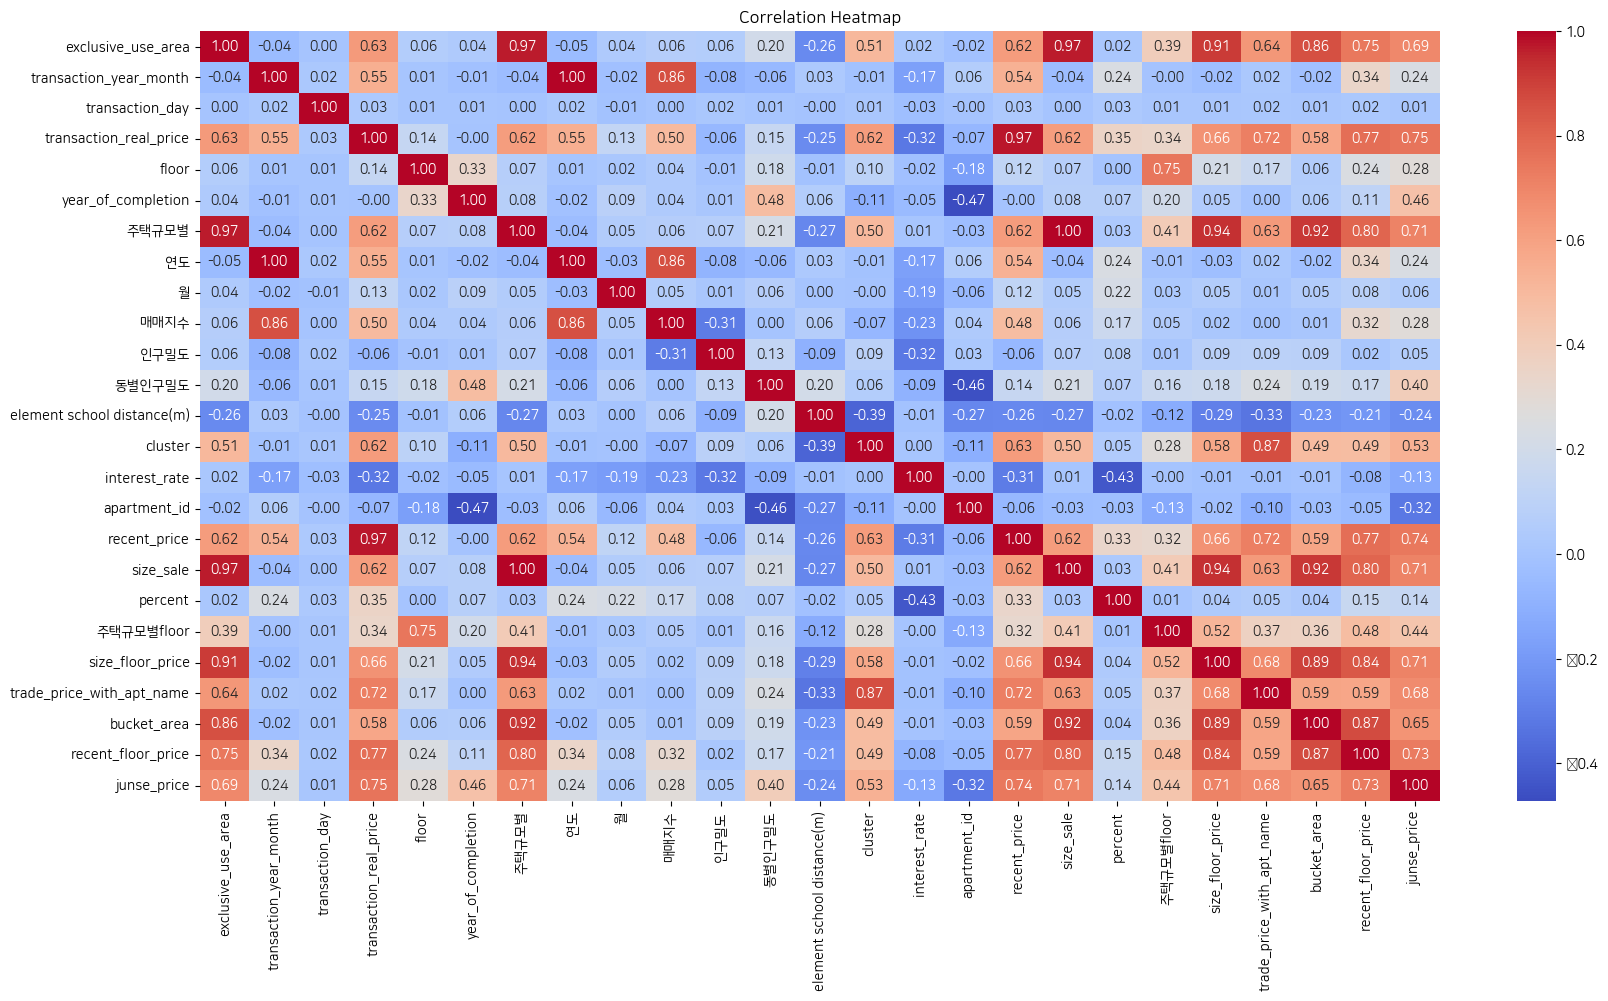

In [79]:
plt.figure(figsize=(20, 10))
sns.heatmap(all_data_copy.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [80]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# import optuna

# validation_year = 2022

# columns = [ 'exclusive_use_area', 'cluster','recent_price','size_sale','size_floor_price','recent_floor_price','연도','월','interest_rate'
# ]

# train_x = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] < validation_year), columns]
# train_y = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] < validation_year), 'transaction_real_price']

# val_x = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] == validation_year), columns]
# val_y = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] == validation_year), 'transaction_real_price']

# def objective(trial):
#     # 하이퍼파라미터 탐색 대상
#     n_estimators = trial.suggest_int('n_estimators', 10, 100)
#     max_depth = trial.suggest_int('max_depth', 2, 32)

#     # RandomForestRegressor 모델 학습
#     model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
#     model.fit(train_x, train_y)

#     # 검증 데이터로 평가
#     y_pred = model.predict(val_x)
#     mse = mean_squared_error(val_y, y_pred)
#     return mse

# # Optuna를 사용하여 하이퍼파라미터 탐색
# study = optuna.create_study(direction='minimize')  # 목표는 최소화
# study.optimize(objective, n_trials=50)  # 50회 반복하여 탐색

# # 최적의 하이퍼파라미터 값 출력
# best_params_rf = study.best_params
# print("Best Params:", best_params_rf)

In [81]:
from sklearn.model_selection import StratifiedKFold # StratifiedKFold 
from catboost import CatBoostClassifier, CatBoostRegressor # catboost
from sklearn.metrics import mean_squared_error
import optuna

validation_year = 2022

columns = [ 'exclusive_use_area', 'cluster','size_sale','size_floor_price','recent_floor_price','연도','월','interest_rate','trade_price_with_apt_name']


train_x = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] < validation_year), columns]
train_y = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] < validation_year), 'transaction_real_price']

val_x = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] == validation_year), columns]
val_y = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] == validation_year), 'transaction_real_price']






def objective(trial):

    cbrm_param = {
        'iterations':trial.suggest_int('iterations', 1, 1000),
        'learning_rate' : trial.suggest_uniform('learning_rate',0, 1),
        'depth': trial.suggest_int('depth',1, 16),
        'random_state' : 7
    }

    # Generate model
    model_cbrm = CatBoostRegressor(**cbrm_param)
    model_cbrm = model_cbrm.fit(train_x, train_y, eval_set=[(val_x, val_y)], 
                           verbose=0, early_stopping_rounds=25)
                           
    # 평가지표 원하는 평가 지표가 있을 시 바꾸어 준다.
    MSE = mean_squared_error(val_y, model_cbrm.predict(val_x))
    return MSE

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials = 50)
best_params_cb = study.best_params
print("Best Params:", best_params_cb)

[I 2023-08-02 23:45:29,534] A new study created in memory with name: no-name-b266ebb3-4eac-4eeb-a125-ed2860a5b1f1
/tmp/ipykernel_613906/535281302.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0, 1),
[I 2023-08-02 23:45:29,706] Trial 0 finished with value: 2513645952.142479 and parameters: {'iterations': 120, 'learning_rate': 0.3795863446633273, 'depth': 6}. Best is trial 0 with value: 2513645952.142479.
/tmp/ipykernel_613906/535281302.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0, 1),
[I 2023-08-02 23:45:29,836] Trial 1 finished with value: 1442103522.791463 and parameters: {'ite

Best Params: {'iterations': 283, 'learning_rate': 0.7835074912363564, 'depth': 2}


In [82]:
import xgboost as xgb

def objective(trial):
    # 하이퍼파라미터 탐색 대상
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.2)

    # RandomForestRegressor 모델 학습
    model = xgb.XGBRegressor(n_estimators=n_estimators,
                             max_depth=max_depth,
                             learning_rate=learning_rate,
                             random_state=7)
    model.fit(train_x, train_y)

    # 검증 데이터로 평가
    y_pred = model.predict(val_x)
    mse = mean_squared_error(val_y, y_pred)
    return mse

# Optuna를 사용하여 하이퍼파라미터 탐색
study = optuna.create_study(direction='minimize')  # 목표는 최소화
study.optimize(objective, n_trials=50)  # 50회 반복하여 탐색

# 최적의 하이퍼파라미터 값 출력
best_params_xgb = study.best_params
print("Best Params:", best_params_xgb)

[I 2023-08-02 23:46:16,591] A new study created in memory with name: no-name-2ea46971-1ced-4040-9469-d6840dae750b
/tmp/ipykernel_613906/3560772862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.2)
[I 2023-08-02 23:46:16,869] Trial 0 finished with value: 3951257772.581703 and parameters: {'n_estimators': 66, 'max_depth': 11, 'learning_rate': 0.037959071490478336}. Best is trial 0 with value: 3951257772.581703.
/tmp/ipykernel_613906/3560772862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.2)
[I 2023-08-02 23:46:16,910] Trial 1 fi

Best Params: {'n_estimators': 51, 'max_depth': 4, 'learning_rate': 0.10447640883020651}


In [83]:
from lightgbm import LGBMRegressor
import numpy as np

def objective(trial):
    # 하이퍼파라미터 탐색 대상
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)

    # LightGBMRegressor 모델 학습
    model = LGBMRegressor(n_estimators=n_estimators,
                          max_depth=max_depth,
                          learning_rate=learning_rate,
                          random_state=7)
    model.fit(train_x, train_y)

    # 모델 예측
    val_pred = model.predict(val_x)

    # 평가 지표로 평균 제곱 오차 (Mean Squared Error, MSE)를 사용
    mse = np.mean((val_pred - val_y) ** 2)

    return mse

# Optuna를 사용하여 하이퍼파라미터 탐색
study = optuna.create_study(direction='minimize')  # 목표는 최소화
study.optimize(objective, n_trials=50)  # 50회 반복하여 탐색

# 최적의 하이퍼파라미터 값 출력
best_params_LGBM = study.best_params
print("Best Params:", best_params_LGBM)


[I 2023-08-02 23:47:03,848] A new study created in memory with name: no-name-af58fc34-154d-47c4-b15d-aabe23c09179
/tmp/ipykernel_613906/2541933366.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
[I 2023-08-02 23:47:04,211] Trial 0 finished with value: 1886288460.3873546 and parameters: {'n_estimators': 453, 'max_depth': 10, 'learning_rate': 0.013991212577585206}. Best is trial 0 with value: 1886288460.3873546.
/tmp/ipykernel_613906/2541933366.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
[I 2023-08-02 23:47:04,257] Trial 1

Best Params: {'n_estimators': 400, 'max_depth': 25, 'learning_rate': 0.05633966458489866}


In [84]:
from sklearn.metrics import mean_absolute_error

for validation_year in [2018, 2019, 2020, 2021, 2022]:
    columns = [ 
'exclusive_use_area', 'cluster','size_sale','size_floor_price','recent_floor_price','연도','월','interest_rate','trade_price_with_apt_name'
    ]
    train_x = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] < validation_year), columns]
    train_y = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] < validation_year), 'transaction_real_price']

    val_x = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] == validation_year), columns]
    val_y = all_data.loc[(all_data['train_test'] == 'train') & (all_data['연도'] == validation_year), 'transaction_real_price']

# 모델 생성 및 훈련
#    model_rf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'],
#                                     max_depth=best_params_rf['max_depth'],
#                                     random_state=7
#                                     )
#    model_rf.fit(train_x, train_y)

    model_xgb = xgb.XGBRegressor(n_estimators=best_params_xgb['n_estimators'],
                              max_depth=best_params_xgb['max_depth'],
                              learning_rate=best_params_xgb['learning_rate'],
                              random_state=7)
    model_xgb.fit(train_x, train_y)
    
    model_cb = CatBoostRegressor(iterations=best_params_cb['iterations'],
                depth=best_params_cb['depth'],
                 learning_rate= best_params_cb['learning_rate']
                ,verbose=0)

    model_cb.fit(train_x, train_y)

    model_LGBM = CatBoostRegressor(iterations=best_params_cb['iterations'],
                 depth=best_params_cb['depth'],
                 learning_rate= best_params_cb['learning_rate']
                ,verbose=0)

    model_LGBM.fit(train_x, train_y)

    #예측
    pred_cb_ls = model_cb.predict(val_x)
    pred_xgb_ls = model_xgb.predict(val_x)
    pred_LGBM_ls = model_LGBM.predict(val_x)
    blended_prediction = (pred_cb_ls + pred_xgb_ls+pred_LGBM_ls)/3
    
    mae1 = mean_absolute_error(blended_prediction, val_y)
    mae2 = mean_absolute_error(pred_cb_ls, val_y)
    mae3 = mean_absolute_error(pred_xgb_ls, val_y)
    mae4 = mean_absolute_error(pred_LGBM_ls, val_y)
    print(validation_year,'년도 MAE_bp: ' , mae1)
    print(validation_year,'년도 MAE_cb: ' , mae2)
    print(validation_year,'년도 MAE_xbb: ' , mae3)
    print(validation_year,'년도 MAE_lgbm: ' , mae4)
    print('----------------------------------------')
    

2018 년도 MAE_bp:  36507.752348486014
2018 년도 MAE_cb:  34478.922435055225
2018 년도 MAE_xbb:  41012.64457738681
2018 년도 MAE_lgbm:  34478.922435055225
----------------------------------------
2019 년도 MAE_bp:  23020.68608189075
2019 년도 MAE_cb:  21746.48147167881
2019 년도 MAE_xbb:  26240.206575768378
2019 년도 MAE_lgbm:  21746.48147167881
----------------------------------------
2020 년도 MAE_bp:  23710.937772227986
2020 년도 MAE_cb:  21956.14599110371
2020 년도 MAE_xbb:  28318.04297886982
2020 년도 MAE_lgbm:  21956.14599110371
----------------------------------------
2021 년도 MAE_bp:  37511.17991679065
2021 년도 MAE_cb:  37803.1706498559
2021 년도 MAE_xbb:  38168.95682730924
2021 년도 MAE_lgbm:  37803.1706498559
----------------------------------------
2022 년도 MAE_bp:  26575.657988430226
2022 년도 MAE_cb:  26844.78679842797
2022 년도 MAE_xbb:  33718.61329780191
2022 년도 MAE_lgbm:  26844.78679842797
----------------------------------------


In [85]:
from sklearn.ensemble import RandomForestRegressor


#columns = ['exclusive_use_area', 'cluster','size_sale','size_floor_price','recent_floor_price','연도','월','interest_rate','trade_price_with_apt_name','주택규모별']
train_x = all_data.loc[all_data['train_test'] == 'train', columns]
train_y = all_data.loc[all_data['train_test'] == 'train', 'transaction_real_price']
test_x = all_data.loc[all_data['train_test'] == 'test', columns]

# 모델 생성 및 훈련
#model_rf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'],
#                                 max_depth=best_params_rf['max_depth'],
#                                 random_state=7)
#model_rf.fit(train_x, train_y)

model_xgb = xgb.XGBRegressor(n_estimators=best_params_xgb['n_estimators'],
                          max_depth=best_params_xgb['max_depth'],
                          learning_rate=best_params_xgb['learning_rate'],
                          random_state=7)
model_xgb.fit(train_x, train_y)

model_cb = CatBoostRegressor(iterations=best_params_cb['iterations'],
                depth=best_params_cb['depth'],
                 learning_rate= best_params_cb['learning_rate'])

model_cb.fit(train_x, train_y)

model_LGBM = CatBoostRegressor(iterations=best_params_cb['iterations'],
                depth=best_params_cb['depth'],
                 learning_rate= best_params_cb['learning_rate'])

model_LGBM.fit(train_x, train_y)

# 예측
pred_ls = list()
pred_ls_cb = list()
pred_ls_xgb = list()
pred_ls_LGBM = list()

now_df = all_data.loc[all_data['train_test'] == 'train']
test = all_data.loc[all_data['train_test'] == 'test']

for idx, row in tqdm(test.iterrows(), total = test.shape[0]):
    now_df = pd.concat([now_df, test.loc[[idx]]])
#    test_x.loc[idx, 'recent_price'] = get_recent_price(idx, now_df)
    
    # 예측
    pred_cb_ls = model_cb.predict(test_x.loc[idx:idx])
#    pred_rf_ls = model_rf.predict(test_x.loc[idx:idx])
    pred_xgb_ls = model_xgb.predict(test_x.loc[idx:idx])
    pred_LGBM_ls = model_xgb.predict(test_x.loc[idx:idx])
    
    blended_prediction = (pred_cb_ls + pred_xgb_ls + pred_LGBM_ls)/3
    
    now_df.loc[idx, 'transaction_real_price'] = blended_prediction
    pred_ls.append(blended_prediction[0])
    pred_ls_cb.append(pred_cb_ls[0])
    pred_ls_xgb.append(pred_xgb_ls[0])
    pred_ls_LGBM.append(pred_LGBM_ls[0])

0:	learn: 52367.2275303	total: 454us	remaining: 128ms
1:	learn: 39316.7901373	total: 844us	remaining: 119ms
2:	learn: 34652.3627736	total: 1.25ms	remaining: 116ms
3:	learn: 32310.1251507	total: 1.65ms	remaining: 115ms
4:	learn: 29044.6695160	total: 2.01ms	remaining: 112ms
5:	learn: 27724.7262830	total: 2.31ms	remaining: 107ms
6:	learn: 26680.6933133	total: 2.6ms	remaining: 103ms
7:	learn: 25555.9528331	total: 2.85ms	remaining: 97.9ms
8:	learn: 23799.1194175	total: 3.08ms	remaining: 93.8ms
9:	learn: 23055.6229116	total: 3.33ms	remaining: 90.9ms
10:	learn: 22438.1622247	total: 3.56ms	remaining: 88ms
11:	learn: 21824.3097776	total: 3.77ms	remaining: 85.2ms
12:	learn: 21133.6330532	total: 4.02ms	remaining: 83.5ms
13:	learn: 20702.3879214	total: 4.27ms	remaining: 82.1ms
14:	learn: 20266.0153531	total: 4.51ms	remaining: 80.7ms
15:	learn: 20063.7124020	total: 4.75ms	remaining: 79.3ms
16:	learn: 19827.1177338	total: 4.97ms	remaining: 77.8ms
17:	learn: 19450.4976698	total: 5.21ms	remaining: 76.

100%|███████████████████████████████████████████| 196/196 [00:01<00:00, 138.26it/s]


In [86]:
submission = pd.read_csv('sample_submission.csv')
submission1 = pd.read_csv('sample_submission.csv')
submission2 = pd.read_csv('sample_submission.csv')
submission3 = pd.read_csv('sample_submission.csv')

submission['transaction_real_price'] = pred_ls
submission1['transaction_real_price'] = pred_ls_cb
submission2['transaction_real_price'] = pred_ls_xgb
submission3['transaction_real_price'] = pred_ls_LGBM
submission.to_csv('sub_blended.csv', index=False)
submission1.to_csv('sub_cb.csv', index=False)
submission2.to_csv('sub_xgb.csv', index=False)
submission3.to_csv('sub_LGBM.csv', index=False)

In [87]:
print(submission['transaction_real_price'])
print('------------------------------------')
print(submission1['transaction_real_price'])
print('------------------------------------')
print(submission2['transaction_real_price'])
print('------------------------------------')
print(submission3['transaction_real_price'])

0      193577.870526
1      148022.857914
2      272462.320436
3      276589.766256
4      275757.516636
           ...      
191    263263.521740
192    337851.419175
193    422558.544789
194    347319.538165
195    160315.809052
Name: transaction_real_price, Length: 196, dtype: float64
------------------------------------
0      174620.205329
1      135356.167491
2      231703.586307
3      242923.361269
4      237703.487408
           ...      
191    224677.065221
192    310297.445026
193    401255.884367
194    321325.864496
195    148295.802155
Name: transaction_real_price, Length: 196, dtype: float64
------------------------------------
0      203056.703125
1      154356.203125
2      292841.687500
3      293422.968750
4      294784.531250
           ...      
191    282556.750000
192    351628.406250
193    433209.875000
194    360316.375000
195    166325.812500
Name: transaction_real_price, Length: 196, dtype: float32
------------------------------------
0      203056.703125
1